# Titan New Incentive Impact Analysis

Analysis Points:
=============
1. Find the mean of old scheme and new scheme column. (5 points)
2. Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points)
3. What conclusion does the test (p-value) lead to? (2.5 points)
4. Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:
    4a. The probability of a type 1 error? (2.5 points)
    4b. What is the p- value of the hypothesis test if we test for a difference of $5000? (10 pts)
    4c. Power of the test (5 points)

In [2]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats 
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from statsmodels.stats.power import ttest_power
import statsmodels.api as sm 

In [3]:
tdata=pd.read_csv('Titan.csv')
tdata.head()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


In [5]:
# change the Column Title & remove '(in thousands)' 
tdata.rename(columns={'Old Scheme (in thousands)':'Old_Scheme'}, inplace=True)
tdata.rename(columns={'New Scheme (in thousands)':'New_Scheme'}, inplace=True)

In [6]:
# change Column values to thousands
tdata['Old_Scheme']=tdata['Old_Scheme'].multiply(1000)
tdata['New_Scheme']=tdata['New_Scheme'].multiply(1000)
tdata.head()

,SALESPERSON,Old_Scheme,New_Scheme
0,1,57000,62000
1,2,103000,122000
2,3,59000,54000
3,4,75000,82000
4,5,84000,84000


1.Find the mean of old scheme and new scheme column. (5 points)

In [7]:
tdata.describe()

,SALESPERSON,Old_Scheme,New_Scheme
count,30.000000,30.000000,30.000000
mean,15.500000,68033.333333,72033.333333
std,8.803408,20455.980212,24062.394947
min,1.000000,28000.000000,32000.000000
25%,8.250000,54000.000000,55000.000000
50%,15.500000,67000.000000,74000.000000
75%,22.750000,81500.000000,85750.000000
max,30.000000,110000.000000,122000.000000


In [28]:
sd(New_Scheme)

NameError: name 'sd' is not defined

In [9]:
#Mean of Old_Scheme is 68033 and New_Scheme is 72033

Other Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9EC377278>]],
      dtype=object)

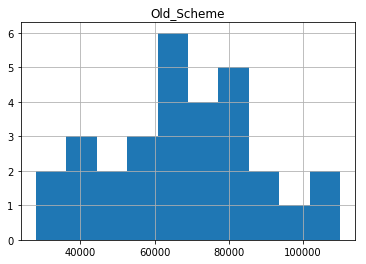

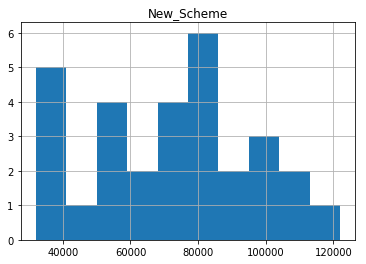

In [10]:
tdata.hist('Old_Scheme')
tdata.hist('New_Scheme')

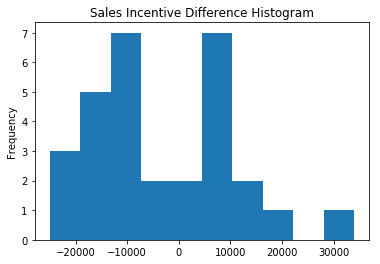

In [11]:
tdata['Diff_Scheme'] = tdata['Old_Scheme'] - tdata['New_Scheme']
tdata['Diff_Scheme'].plot(kind='hist', title= 'Sales Incentive Difference Histogram')
#Again, this saves the plot as a png file
plt.savefig('Sales Incentive difference histogram.png')


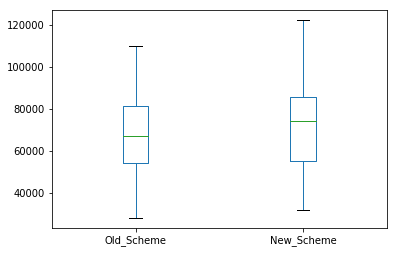

In [12]:
#check for any significant outliers in each of the variables
tdata[['Old_Scheme', 'New_Scheme']].plot(kind='box')
plt.savefig('boxplot_outliers.png')

In [13]:
# data seems normally distributed for old n new scheme
# no significant outlier observed

2. Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points)

In [14]:
# sample size =30
# Population parameters not known, will apply sample t test (paired)
# level of significance assumed 0.05
# dof=29 (30 samples - 1)
# HYPOTHESIS
    # H0 : Old_Avg - New_Avg =0 (NO significant rise in outputs post incentive change)
    # H1 : Old_Avg - New_Avg <> 0 (There is significant rise in outputs post incentive change) 

In [15]:
#Paired T Test
stats.ttest_rel(tdata['Old_Scheme'], tdata['New_Scheme'])

Ttest_relResult(statistic=-1.5559143823544377, pvalue=0.13057553961337662)

In [16]:
# one sample t-test
# null hypothesis: expected value = 68033
t_statistic, p_value = ttest_1samp((tdata.New_Scheme-tdata.Old_Scheme), 0)
print(t_statistic,(p_value))
# as it is one side t-test, p_value needs to be divided by 2

print('p value is',(p_value/2))


1.5559143823544377 0.13057553961337662
p value is 0.06528776980668831


3.What conclusion does the test (p-value) lead to? (2.5 points)

In [17]:
# Conclusion - p value is greater than 0.05, H0 is true 
# i.e, There is NO significant rise in outputs post incentive change

4. Suppose it has been calculated that in order for Titan to break even, the average output must increase by $5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is: 
    
    4a. The probability of a type 1 error? (2.5 points) 

In [19]:
#The probability of a type 1 error or level of significance is 0.05

4b. What is the p- value of the hypothesis test if we test for a difference of $5000? (10 pts) 

In [20]:
#Old_Avg = Sum of Insurance Sales assured BEFORE change in Incentive Plan 
#New_Avg = Sum of Insurance Sales assured AFTER change in Incentive Plan 
#Avg_Diff = Old_Avg-New_Avg
#H0 : Avg_Diff <= $5000
#H1 : Avg_Diff > $5000


In [21]:
# one sample t-test
# null hypothesis (H0) : Avg_Diff <= $5000
t_statistic, p_value = ttest_1samp((tdata.New_Scheme-tdata.Old_Scheme), 5000)
print(t_statistic,p_value)
print ("paired t-test p-value=", p_value)

-0.3889785955886094 0.7001334912613286
paired t-test p-value= 0.7001334912613286


4c. Power of the test (5 points)

In [22]:
#Derive T-critical value
sample_size = 30
sample = np.random.choice(a= tdata.New_Scheme, size = sample_size)
#sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.95, df=29) 
print("t-critical value:")                  # Check the t-critical value
print(t_critical)  

t-critical value:
1.6991270265334972


In [59]:
# Caculating power of test 

(np.mean(tdata.New_Scheme) - np.mean(tdata.Old_Scheme)) / np.sqrt(((30-1)*np.var(tdata.Old_Scheme)+(30-1)*np.var(tdata.New_Scheme)) / 30+30-2)

0.13102028811290184

In [60]:
#Probability of making Type II Error
print(ttest_power(0.13102028811290184, nobs=30, alpha=0.05, alternative='larger'))

0.17261376075235535


In [61]:
#Power of test is 1- beta = 
1-0.17261376075235535


0.8273862392476447